<a href="https://colab.research.google.com/github/mrmohit-cpu/AITA-ASSN1/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Install Graphviz and pygraphviz
!apt-get install -y graphviz libgraphviz-dev pkg-config
!pip install pygraphviz


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
The following packages were automatically installed and are no longer required:
  libbz2-dev libpkgconf3 libreadline-dev
Use 'apt autoremove' to remove them.
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libgvc6-plugins-gtk
  librsvg2-common libxdot4
Suggested packages:
  gvfs
The following packages will be REMOVED:
  pkgconf r-base-dev
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4 pkg-config
0 upgraded, 10 newly installed, 2 to remove and 49 not upgraded.
Need to get 2,482 kB of archives.
After this operation, 7,670 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 pkg-config a

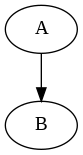

In [3]:
import pygraphviz as pgv

# Create a simple graph
graph = pgv.AGraph(directed=True)

# Add nodes and edges
graph.add_node("A")
graph.add_node("B")
graph.add_edge("A", "B")

# Draw the graph and save it as an image
graph.draw('output_graph.png', prog='dot')

# Display the image in Colab
from IPython.display import Image
Image('output_graph.png')


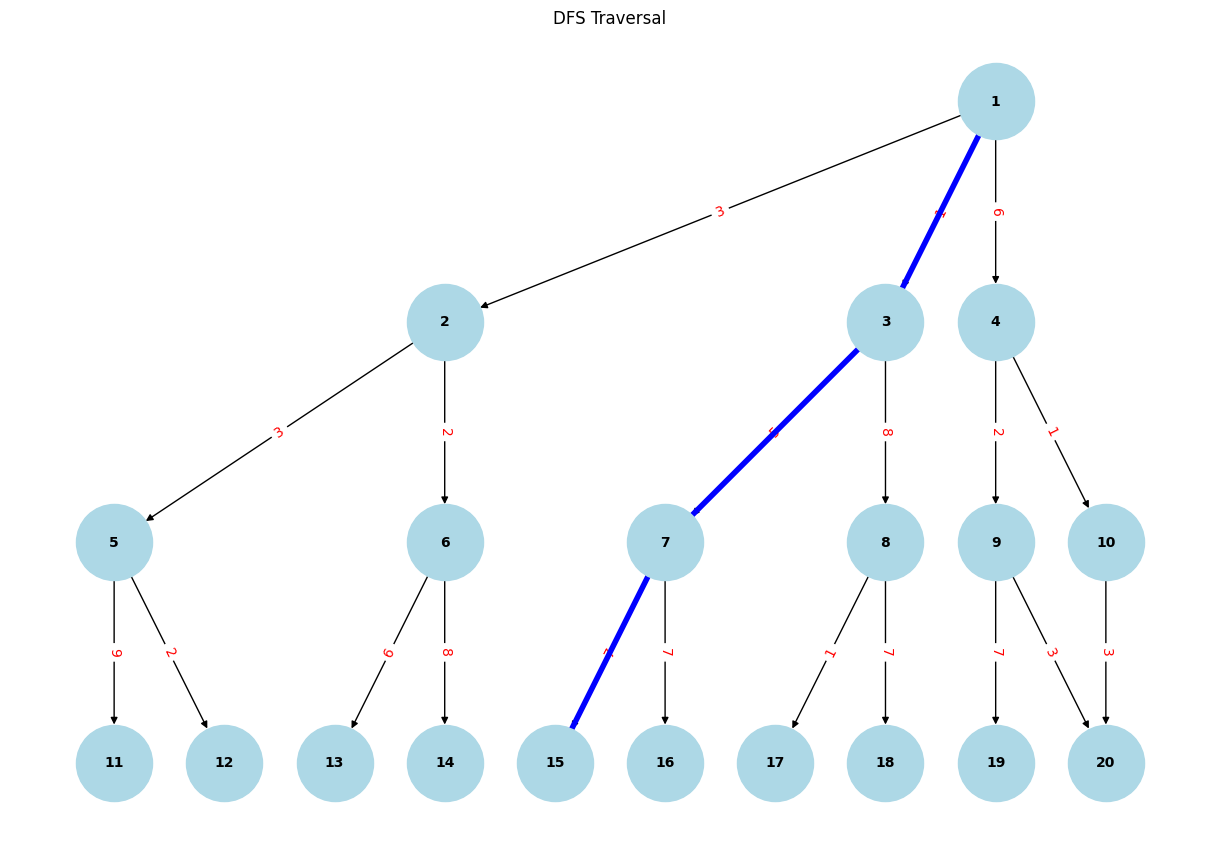

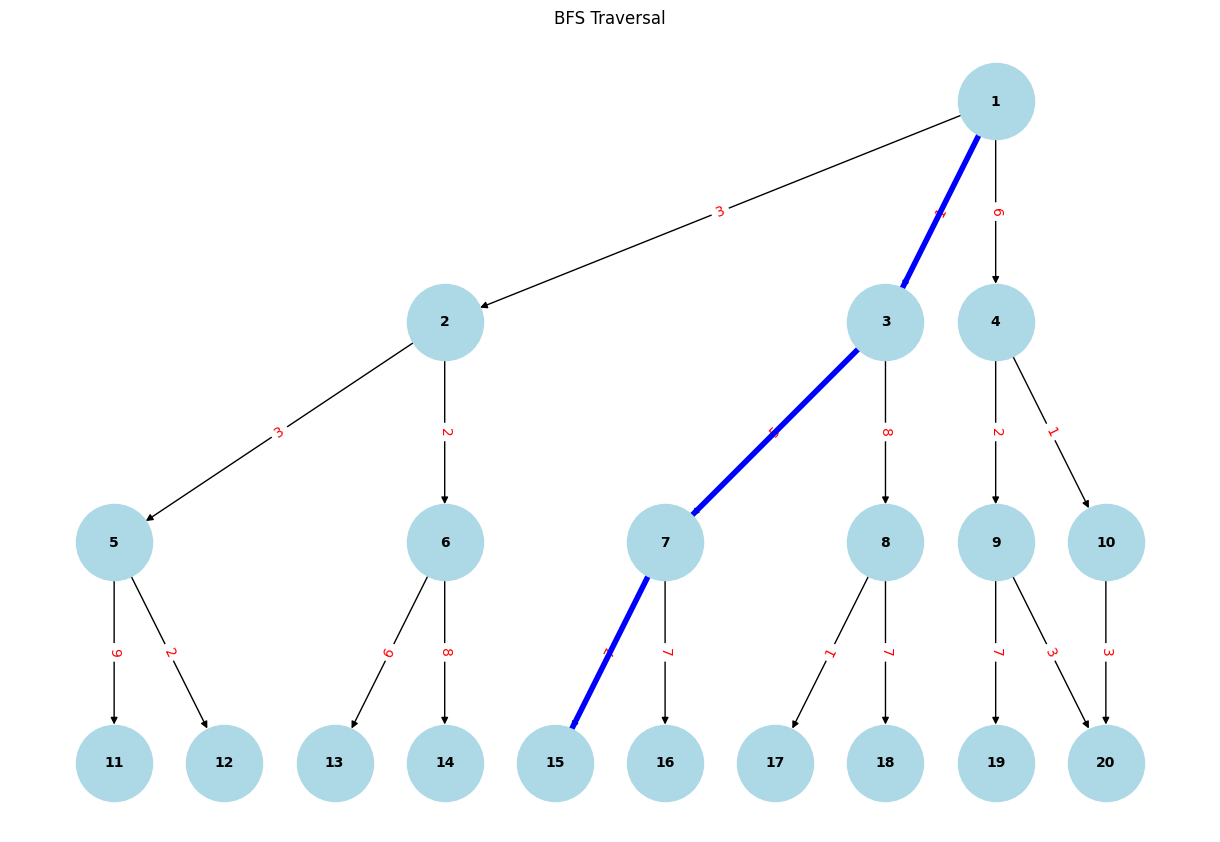

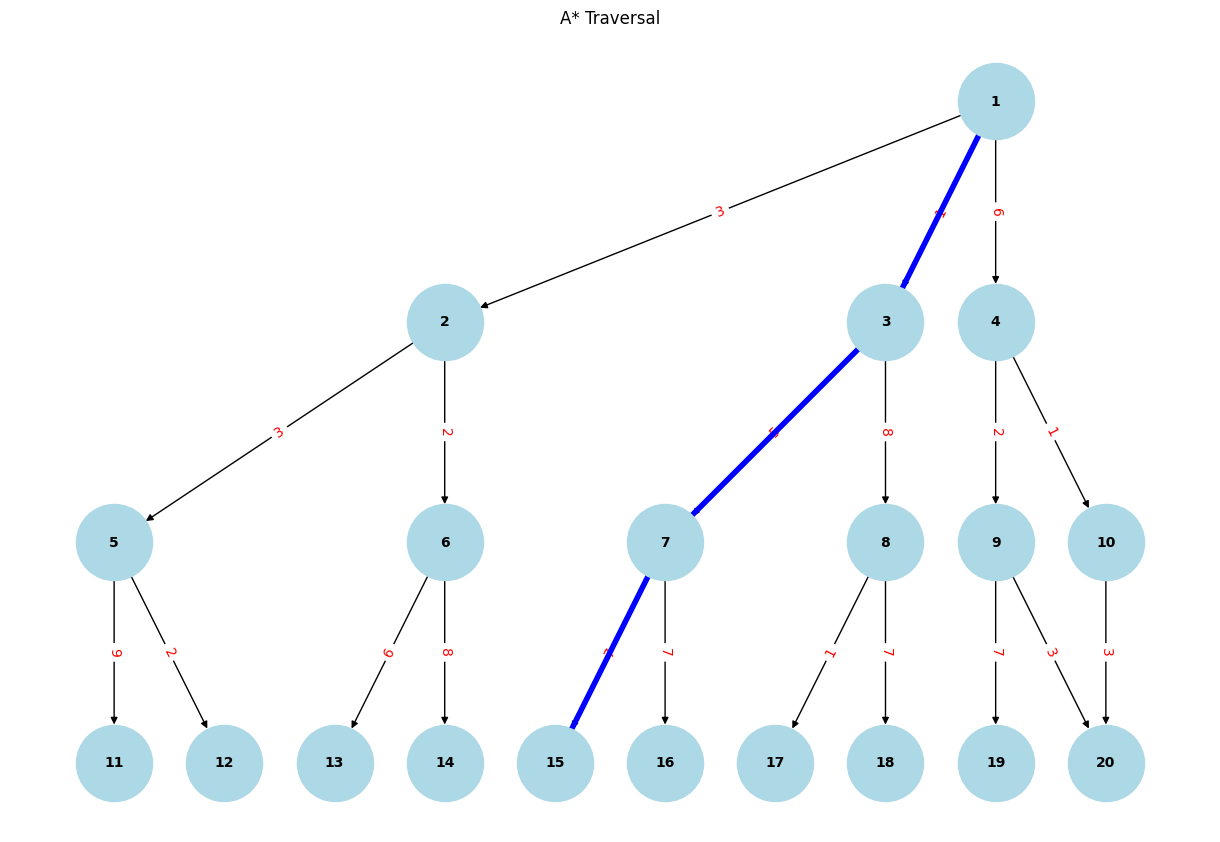

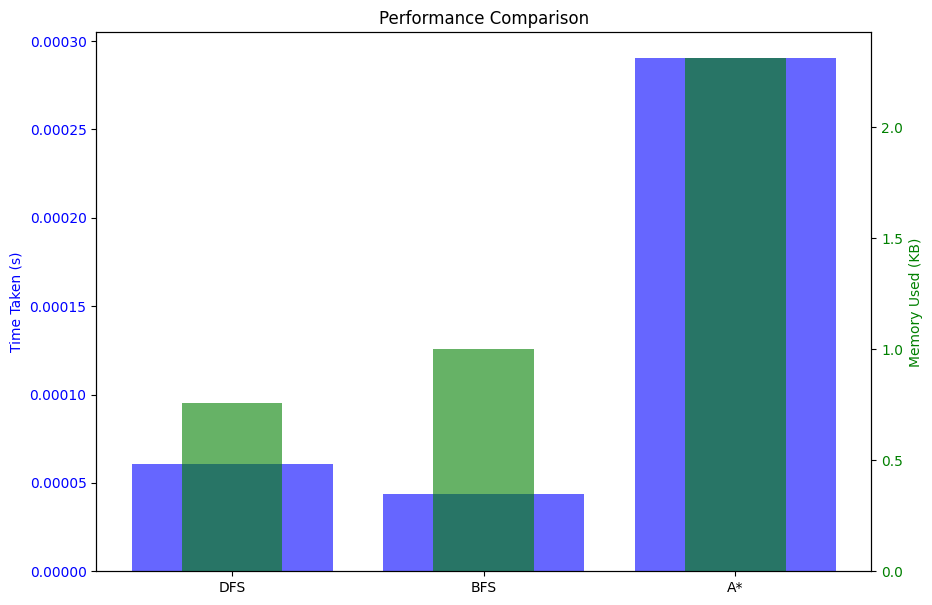

DFS Performance: {'path': [1, 3, 7, 15], 'time_taken': 6.0558319091796875e-05, 'memory_used': 0.7578125}
BFS Performance: {'path': [1, 3, 7, 15], 'time_taken': 4.363059997558594e-05, 'memory_used': 1.0}
A* Performance: {'path': [1, 3, 7, 15], 'time_taken': 0.0002903938293457031, 'memory_used': 2.3125}


In [4]:
import matplotlib.pyplot as plt
import networkx as nx
import time
import tracemalloc
from queue import PriorityQueue

# Create the tree structure with weights
edges = [
    (1, 2, 3), (1, 3, 1), (1, 4, 6),
    (2, 5, 3), (2, 6, 2), (3, 7, 5),
    (3, 8, 8), (4, 9, 2), (4, 10, 1),
    (5, 11, 9), (5, 12, 2), (6, 13, 6),
    (6, 14, 8), (7, 15, 7), (7, 16, 7),
    (8, 17, 1), (8, 18, 7), (9, 19, 7),
    (9, 20, 3), (10, 20, 3)
]

graph = nx.DiGraph()
for edge in edges:
    graph.add_edge(edge[0], edge[1], weight=edge[2])

# Visualize the tree with a downward descending layout
def visualize_tree(graph, path=None, title="Tree with Costs"):
    plt.figure(figsize=(12, 8))
    pos = nx.nx_agraph.graphviz_layout(graph, prog='dot')  # 'dot' layout for hierarchical, top-down view
    nx.draw(graph, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold')
    edge_labels = nx.get_edge_attributes(graph, 'weight')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_color='red')

    if path:
        path_edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
        nx.draw_networkx_edges(graph, pos, edgelist=path_edges, width=4, edge_color='blue')

    plt.title(title)
    plt.show()

# Depth-First Search (DFS)
def dfs(graph, start, goal):
    stack = [(start, [start])]
    visited = set()

    tracemalloc.start()
    start_time = time.time()

    while stack:
        (vertex, path) = stack.pop()
        if vertex in visited:
            continue

        visited.add(vertex)

        for neighbor in graph.neighbors(vertex):
            if neighbor == goal:
                path.append(neighbor)
                end_time = time.time()
                _, peak_memory = tracemalloc.get_traced_memory()
                tracemalloc.stop()
                return {'path': path, 'time_taken': end_time - start_time, 'memory_used': peak_memory / 1024}

            stack.append((neighbor, path + [neighbor]))

    end_time = time.time()
    _, peak_memory = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    return {'path': None, 'time_taken': end_time - start_time, 'memory_used': peak_memory / 1024}

# Breadth-First Search (BFS)
def bfs(graph, start, goal):
    queue = [(start, [start])]
    visited = set()

    tracemalloc.start()
    start_time = time.time()

    while queue:
        (vertex, path) = queue.pop(0)
        if vertex in visited:
            continue

        visited.add(vertex)

        for neighbor in graph.neighbors(vertex):
            if neighbor == goal:
                path.append(neighbor)
                end_time = time.time()
                _, peak_memory = tracemalloc.get_traced_memory()
                tracemalloc.stop()
                return {'path': path, 'time_taken': end_time - start_time, 'memory_used': peak_memory / 1024}

            queue.append((neighbor, path + [neighbor]))

    end_time = time.time()
    _, peak_memory = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    return {'path': None, 'time_taken': end_time - start_time, 'memory_used': peak_memory / 1024}

# A* Search Algorithm
def a_star(graph, start, goal):
    pq = PriorityQueue()
    pq.put((0, start, [start]))
    visited = set()
    costs = {start: 0}

    tracemalloc.start()
    start_time = time.time()

    while not pq.empty():
        (cost, vertex, path) = pq.get()
        if vertex in visited:
            continue

        visited.add(vertex)

        if vertex == goal:
            end_time = time.time()
            _, peak_memory = tracemalloc.get_traced_memory()
            tracemalloc.stop()
            return {'path': path, 'time_taken': end_time - start_time, 'memory_used': peak_memory / 1024}

        for neighbor in graph.neighbors(vertex):
            new_cost = cost + graph[vertex][neighbor]['weight']
            if neighbor not in costs or new_cost < costs[neighbor]:
                costs[neighbor] = new_cost
                pq.put((new_cost, neighbor, path + [neighbor]))

    end_time = time.time()
    _, peak_memory = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    return {'path': None, 'time_taken': end_time - start_time, 'memory_used': peak_memory / 1024}

# Run the algorithms and visualize results
start_node = 1
goal_node = 15

dfs_result = dfs(graph, start_node, goal_node)
bfs_result = bfs(graph, start_node, goal_node)
a_star_result = a_star(graph, start_node, goal_node)

# Visualize DFS Traversal
visualize_tree(graph, dfs_result['path'], "DFS Traversal")

# Visualize BFS Traversal
visualize_tree(graph, bfs_result['path'], "BFS Traversal")

# Visualize A* Traversal
visualize_tree(graph, a_star_result['path'], "A* Traversal")

# Performance Comparison
def plot_performance_comparison(dfs_result, bfs_result, a_star_result):
    algorithms = ['DFS', 'BFS', 'A*']
    time_taken = [dfs_result['time_taken'], bfs_result['time_taken'], a_star_result['time_taken']]
    memory_used = [dfs_result['memory_used'], bfs_result['memory_used'], a_star_result['memory_used']]

    plt.figure(figsize=(10, 7))

    # Plotting Time Taken
    plt.bar(algorithms, time_taken, color='blue', alpha=0.6, label='Time Taken (s)')
    plt.ylabel('Time Taken (s)', color='blue')
    plt.tick_params(axis='y', labelcolor='blue')

    ax2 = plt.gca().twinx()  # Create a second y-axis
    ax2.bar(algorithms, memory_used, color='green', alpha=0.6, label='Memory Used (KB)', width=0.4)
    ax2.set_ylabel('Memory Used (KB)', color='green')
    ax2.tick_params(axis='y', labelcolor='green')

    plt.title('Performance Comparison')
    plt.show()

# Plot and display performance comparison
plot_performance_comparison(dfs_result, bfs_result, a_star_result)

# Print performance results
print("DFS Performance:", dfs_result)
print("BFS Performance:", bfs_result)
print("A* Performance:", a_star_result)